# Lab 6 - Multivariate Nonlinear Continuous-time Deterministic (MNCD) models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate

## Simplest Version of the Predator-Prey Model

In lab 5 I introduced several continuous-time deterministic models, although without much biological context. This lab will introduce one of the most well-known multivariate nonlinear continuous-time deterministic models that describes the interaction between two species: the Lotka-Volterra Predator-Prey model. (See model below)

$$
\begin{align}
\frac{dx}{dt} &= ax - bxy \\
\frac{dy}{dt} &= cxy - dy
\end{align}
$$

In this system, $x$ represents the prey population and $y$ represents the predator population. In this model, all of the paramaters are strictly positive, i.e., $a,b,c,d>0$. Given these definitions, let's discuss the following questions through a biological lens:


1. What happens when there are no prey in the system?
    - When there are no prey, the equation representing the change in the predator population becomes $\frac{dy}{dt} = -dy$. Thus, in the abscence of prey, the predator population will decay exponentially.
2. What happens when there are no predators in the system?
    - When there are no predators, the equation representing the change in the prey population becomes $\frac{dx}{dt} = ax$. Thus, in the abscence of predators, the prey population will grow exponentially.
3. What do the $xy$ terms represent?
    - The $xy$ term represents the interaction between the two species, in the predator prey model this represents predation. 
4. What is the biological interpretation of the parameters?
    - $a$ is the growth rate of prey the absence of predation
    - $d$ is the death rate of predators in the absence of food (prey)
    - $b$ is the death rate per encounter with a predator due to predation
    - $c$ is the rate at which the predator population grows per encounter with prey due to predation

As this is a very simple example of the interaction between two species, there are a few caveats. What assumptions does the model make that may not be biologically accurate?

- The exponential growth of prey in the absence of predators is unlikely, in reality there will be some sort of carrying capacity due to resource limitations
- It is unlikely that the prey in question are the only source of food for the predators, in reality the absence of a single prey species is unlikely to cause strict exponential decay of the predators
- As is, the interaction term, also known as the "mass action" term, assumes that the predators and prey are moving about randomly and are uniformly distributed in a fixed region. This is described in the book *Mathematical Models in Biology* by Leah Edelstein-Keshet in the following quote:
    - "The $xy$ term approximates the likelihood that an encounter takes place between predators and prey given that both species move about randomly and are uniformly distributed over their habitat... . The form of this encounter rate is derived from the *law of mass action* that, in its original context, states that the rate of molecular collisions of two chemical species in a dilute gas or solution is proportional to the product of the two concentrations. We should bear in mind that this simple relationship may be inaccurate in describing the subtle interations and motions of organisms." 

**Exercise 1**: Find the equilibria of this model. (Remember that this occurs when $\frac{dx}{dt}=\frac{dy}{dt}=0$).

$(x^*,y^*)=(0,0)$ **Note: this should always be an equilibrium point in a biological model**

$(x^*,y^*)=(\frac{d}{c}, \frac{a}{b})$

### Stability Analysis

To determine the stability of the fixed points we must first find the Jacobian of the system. The Jacobian is defined as the matrix of the first order partial derivatives of the system. For example if we let $\frac{dx}{dt}=f_1(x,y)$ and $\frac{dy}{dt}=f_2(x,y)$, then the Jacobian of the system is as follows.

$$
J = \begin{bmatrix} \frac{\partial f_1(x,y)}{\partial x} & \frac{\partial f_1(x,y)}{\partial y} \\ \frac{\partial f_2(x,y)}{\partial x} & \frac{\partial f_2(x,y)}{\partial y} \end{bmatrix}
$$

**Exercise 2**: Find the Jacobian of the Lotka-Volterra Predator-Prey model.

$$
J = \begin{bmatrix} a-by & -bx \\ cy & cx-d \end{bmatrix}
$$

Once we have found the Jacobian, in order to determine the stability of the equilibria, we must inspect the eigenvalues of the Jacobian when evaluated at the equilibria. For example, if $(x^*,y^*)$ is a fixed point of the following system:

$$
\begin{align}
\frac{dx}{dt} &= f_1(x,y) \\
\frac{dy}{dt} &= f_2(x,y)
\end{align}
$$

If the eigenvalues of $J(x^*,y^*)$ both have the real part less than zero, then the equilibrium point is stable. If at least one has real part greater than zero, then the equilibrium point is unstable. If one eigenvalue has real part less than or equal to zero, and there is at least one eigenvalue with real part equal to zero, we cannot use the Jacobian analysis to determine stability of the equilibrium point. 

**Exercise 3**: Determine the stability of each fixed point. 

for $(x^*,y^*)=(0,0)$:

$$
J(0,0) = \begin{bmatrix} a & 0 \\ 0 & -d \end{bmatrix}
$$

Since this is a diagonal matrix, the eigenvalues are $a$ and $-d$. Since $a,d>0$, one eigenvalue is positive and the other is negative, resulting in an unstable saddle.

$(x^*,y^*)=(\frac{d}{c}, \frac{a}{b})$

$$
J(\frac{d}{c}, \frac{a}{b}) = \begin{bmatrix} 0 & \frac{-bd}{c} \\ \frac{ca}{b} & 0 \end{bmatrix}
$$
 
By definition of the characteristic equation for 2x2 matrices, letting $J(\frac{d}{c}, \frac{a}{b})=A$ 

$$
\lambda^2 -\text{tr}(A)\lambda +\text{det}(A)
$$

So using the quadratic equation we get:

$$
\lambda = \frac{\text{tr}(A) \pm \sqrt{\text{tr}(A)^2-4\text{det}(A)}}{2}
$$

Since in this case, $\text{tr}(A)=0$ and $\text{det}(A)=ad$, our eigenvalues are as follows:

$$
\begin{align}
\lambda &= \pm\frac{\sqrt{-4ad}}{2}\\
&= \pm(\sqrt{ad})i
\end{align}
$$

In this case since we have two purely imaginary eigenvalues, the equilibrium is an unstable center.

**Exercise 4**: Use the techniques from Lab 5 to write a function that produces a direction field plot for when $x > 0$ and when $y > 0$, along with a solution trajectory overtop. Your function should take as input: model, parameters, t and initial conditions. **Hint: if you initiate the plot of the solution trajectory before defining the xmax and ymax, you can use ``xmax = plt.xlim(xmin=0)[1]`` and ``ymax = plt.ylim(ymin=0)[1]`` to find the minimum axes limits that will show the solution trajectory**

In [6]:
def df_pred_prey(mod, params, t, X0):
    X = integrate.odeint(mod, X0, t, args=params)
    f = plt.figure()
    plt.plot(X[:,0], X[:,1])
    
    xmax = plt.xlim(xmin=0)[1]
    ymax = plt.ylim(ymin=0)[1]
    
    n_points = 20
    
    x = np.linspace(0, xmax, n_points)
    y = np.linspace(0, ymax, n_points)
    
    X1, Y1 = np.meshgrid(x, y)
    DX1, DY1 = mod([X1, Y1], 0, params[0], params[1], params[2], params[3])
    
    M = (np.hypot(DX1, DY1))
    M[M == 0] = 1.
    
    DX1 /= M
    DY1 /= M
    
    plt.title('Predator-Prey Model')
    Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
    plt.xlabel('Prey')
    plt.ylabel('Predators')
    plt.grid()
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    plt.show

**Exercise 5:** Use your direction field function from exercise 4 to produce the direction field for the Predator-Prey model with strictly positive parameters and initial conditions. Check that the results match the stability in exercise 3.

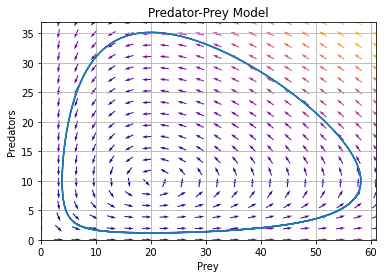

In [7]:
def pred_prey(X, t, a, b, c, d):
    x, y = X[0], X[1]
    return [a*x - b*x*y, -d*y + c*x*y]

params = (1.,0.1,0.075,1.5)
X0 = [6, 3]
t = np.linspace(0, 15, 1000)

df_pred_prey(pred_prey, params, t, X0)

**Exercise 6:** Discuss the model results from exercises 1-5 in the real-world context. What kind of behaviour does this model predict for the interaction between predator and prey. Do the model predictions make sense?

The model predicts an oscillatory behaviour in the populations, such that the peaks of each population are slightly out of phase.  That is, the prey population will increase until the population of predators reaches a point that results in more deaths than births of prey. Afterwards the predator population will increase due to predation predation until there are not enough prey for predation to sustain the predator population. Then the predators will begin to die, and will reach a sufficiently low level that the prey population will begin to increase once again. This cyclic behaviour continues on periodically.

**Exercise 7:** Suggest a variation of the simple predator-prey model that may more accurately represent the real-life interactions between predators and prey that are _not_ the variations explored in the homework. Discuss why your suggestion may make for a more useful model.

Change the $xy$ term so that it considers the fact that predators and prey are not necessarily uniformly distributed. For example wolves hunt in packs not alone, so some prey, depending on their location, are more or less likely to experience predation.

## References 

Edelstein-Keshet, L. (2005). Mathematical models in biology. Society for Industrial and Applied Mathematics.